In [77]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [78]:
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [79]:
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)
cardio1_df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [80]:
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()
cardio_1 = cardio_1[cardio_1['ap_hi']>=50]
cardio_1 = cardio_1[cardio_1['ap_hi']<200]


In [81]:
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()
cardio_0 = cardio_0[cardio_0['ap_hi']>=50]
cardio_0 = cardio_0[cardio_0['ap_hi']<200]


In [82]:
stats.ttest_ind(cardio_0['ap_hi'], cardio_1['ap_hi'], equal_var = False)

Ttest_indResult(statistic=-126.69948484685598, pvalue=0.0)

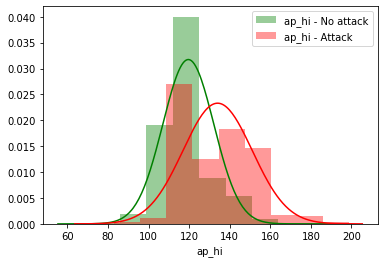

In [83]:
#syst_bp0 = sns.distplot(cardio_0["ap_hi"], bins=10, fit=stats.norm, kde=False, label = “ap_hi No attack”, color = “g”, fit_kws={“color”:“green”})
#syst_bp1 = sns.distplot(cardio_1["ap_hi"], bins=10, fit=stats.norm, kde=False, label = “ap_hi Attack”, color = “r”, fit_kws={“color”:“red”})
#plt.legend()
#plt.show()

#plt.xlim(0,2500)

ax0 = sns.distplot(cardio_0["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(cardio_1["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - Attack", color ="r", fit_kws={"color":"red"})
plt.legend()
plt.show()

# syst_bp0.set(xlim = [0,1250])
# syst_bp1.set(xlim = [0,1250])

In [84]:
#Observed

normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 1])
print(normal_chol_attack)

above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 2])
print(above_normal_chol_attack)

well_above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 3])
print(well_above_normal_chol_attack)

22895
5691
6127


In [85]:
observed_cholesterol=pd.Series([normal_chol_attack,above_normal_chol_attack, well_above_normal_chol_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
observed_cholesterol

normal cholesterol               22895
above normal cholesterol          5691
well above normal cholesterol     6127
dtype: int64

In [86]:
#Expected

normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 1])
print(normal_chol_no_attack)

above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 2])
print(above_normal_chol_no_attack)

well_above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 3])
print(well_above_normal_chol_no_attack)

29223
3780
1885


In [87]:
expected_cholesterol=pd.Series([normal_chol_no_attack, above_normal_chol_no_attack, well_above_normal_chol_no_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
expected_cholesterol 

normal cholesterol               29223
above normal cholesterol          3780
well above normal cholesterol     1885
dtype: int64

In [88]:
df = pd.DataFrame([observed_cholesterol,expected_cholesterol]).T

In [89]:
df.columns = ['observed cholesterol','expected cholesterol']

In [90]:
df

,observed cholesterol,expected cholesterol
normal cholesterol,22895,29223
above normal cholesterol,5691,3780
well above normal cholesterol,6127,1885


In [91]:
stats.chisquare(df['observed cholesterol'], df['expected cholesterol'])

Power_divergenceResult(statistic=11882.580754299395, pvalue=0.0)